<a href="https://colab.research.google.com/github/Marco-Barraza/Proyectos-Analisis-Financieros/blob/main/S%26P_500_y_el_IPSA_entre_1994_y_2024/An%C3%A1lisis_y_comparaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [ ]:
#Conectar con la api de yahoo y extraer datos del s&p 500
stocks = ["^GSPC"]
sp_500 = yf.download(stocks, start="1994-10-07", end="2024-10-06")["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [ ]:
#Nuevo titulo en columna
sp_500.rename(columns={"^GSPC":"S&P 500"}, inplace=True)

In [ ]:
#Impotar datos excel con datos de ipsa
ipsa = pd.read_excel("/content/Cuadro_26112024183329.xlsx", index_col=0, parse_dates=True)

In [ ]:
#Cortar datos
ipsa = ipsa.loc["1994-10-07":]
ipsa = ipsa.dropna()

In [ ]:
#Eliminar la información de zona horaria (hacer ambos índices naive)
sp_500.index = sp_500.index.tz_localize(None)
ipsa.index = ipsa.index.tz_localize(None)

In [ ]:
#Agregar una zona horaria específica (hacer ambos índices tz-aware)
sp_500.index = sp_500.index.tz_convert('UTC') if sp_500.index.tz else sp_500.index.tz_localize('UTC')
ipsa.index = ipsa.index.tz_convert('UTC') if ipsa.index.tz else ipsa.index.tz_localize('UTC')

In [ ]:
#Unir dataframes
indices = pd.concat([sp_500, ipsa], axis=1)

In [ ]:
#Rellenar valores faltantes y revisión de nulos
indices[["S&P 500", "IPSA"]] = indices[["S&P 500", "IPSA"]].ffill().bfill()
indices.isnull().sum()

,0
S&P 500,0
IPSA,0


In [ ]:
#Cambiar formato de fecha en el indice
indices.index = indices.index.strftime('%Y-%m-%d')

###Análisis general de los últimos 30 años


In [ ]:
indices_completo = indices.copy()
# Calcular los retornos porcentuales
retornos = indices_completo.pct_change().dropna()

# Calcular el retorno compuesto y convertir a porcentaje con dos decimales
r_compuesto = ((retornos + 1).prod() - 1) * 100
r_compuesto = r_compuesto.round(2)
print(r_compuesto)

S&P 500    1163.69
IPSA        530.15
dtype: float64


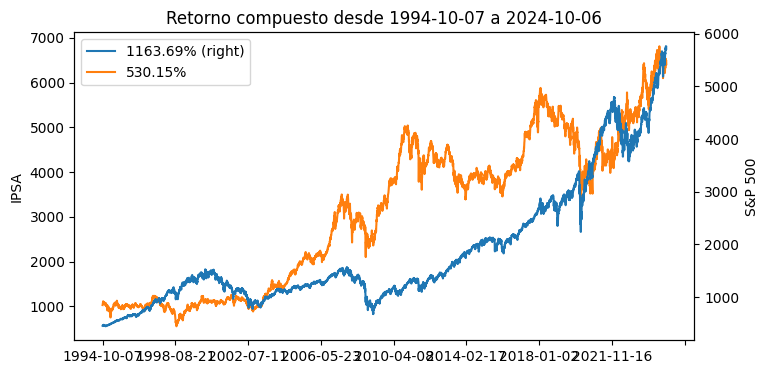

In [ ]:
ax = indices_completo["S&P 500"].plot(secondary_y=True, legend=True, label="1163.69%", figsize=(8,4))
indices_completo["IPSA"].plot(legend=True, label="530.15%", ax=ax)
plt.title("Retorno compuesto desde 1994-10-07 a 2024-10-06")
ax.set_ylabel("S&P 500")  # Eje Y derecho para S&P 500
ax.left_ax.set_ylabel("IPSA")  # Eje Y izquierdo para IPSA
plt.show()

In [ ]:
# Número de periodos
n_periodos = indices.shape[0]

# Cálculo del retorno anualizado, convertido a porcentaje y redondeado
r_anual = (((r_compuesto / 100 + 1) ** (252 / n_periodos) - 1) * 100).round(2)

# Cálculo de la volatilidad anualizada, convertida a porcentaje y redondeada
v_anual = (retornos.std() * np.sqrt(252) * 100).round(2)

# Coeficiente de variación (CoV)
cov = (r_anual / v_anual).round(2)

# Ratio de Sharpe, con una tasa libre de riesgo del 3% (0.03)
r_sharpe = ((r_anual - 3) / v_anual).round(2)

# Crear el DataFrame para almacenar los resultados
indicadores = pd.DataFrame({
    'S&P 500': [r_anual["S&P 500"], v_anual["S&P 500"], cov["S&P 500"], r_sharpe["S&P 500"]],
    'IPSA': [ r_anual["IPSA"], v_anual["IPSA"], cov["IPSA"], r_sharpe["IPSA"]]
}, index=['Retorno Anualizado', 'Volatilidad Anualizada', 'CoV', 'Ratio Sharpe'])

# Formatear las columnas con porcentaje para incluir el símbolo %
indicadores_pct = indicadores.map(lambda x: f"{x:.2f}%" if x > 1  else x)

# Mostrar el DataFrame
print(indicadores_pct)

                       S&P 500    IPSA
Retorno Anualizado       8.60%   6.17%
Volatilidad Anualizada  18.60%  17.87%
CoV                       0.46    0.35
Ratio Sharpe               0.3    0.18


Análisis: Durante las últimas tres décadas, los índices bursátiles S&P 500 y el IPSA han tenido desempeños muy diferentes debido a factores macroeconómicos, eventos globales y las particularidades de sus respectivas economías.
El S&P 500, con un retorno compuesto del 1163,69% y un retorno anualizado del 8,6%, ha mostrado un rendimiento sólido impulsado por el crecimiento de sectores como la tecnología, finanzas y consumo masivo en Estados Unidos. La volatilidad anualizada del 18,6% indica que, aunque ha habido períodos de alta volatilidad, como la crisis financiera de 2008 y la crisis del COVID-19 en 2020, el índice ha demostrado resiliencia a largo plazo. El coeficiente de variación (0,46) sugiere una relación razonable entre riesgo y rendimiento, mientras que el ratio de Sharpe de 0,3, con una tasa libre de riesgo del 3%, indica un rendimiento ajustado al riesgo moderado.
El IPSA, con un retorno compuesto del 530,15% y un retorno anualizado del 6,17%, ha tenido un desempeño más bajo en comparación con el S&P 500. Chile, siendo una economía más dependiente de los recursos naturales y con menor diversificación sectorial, ha sido más susceptible a fluctuaciones de commodities y cambios en el entorno político y económico local. La volatilidad anualizada del IPSA (17,87%) es ligeramente inferior a la del S&P 500, lo que indica un nivel similar de riesgo. Sin embargo, el coeficiente de variación (0,35) y el ratio de Sharpe (0,18) reflejan una menor compensación por unidad de riesgo en comparación con el S&P 500.

###Reducción máxima de los índices

In [ ]:
#Funcion de la reduccion maxima
def drawdown(return_series: pd.Series):
    """Toma una serie temporal de rendimientos de activos.
       Devuelve un DataFrame con columnas para
       el índice de riqueza
       los picos anteriores, y
       el porcentaje de reducción
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index,
                         "Previous Peak": previous_peaks,
                         "Drawdown": drawdowns})

In [ ]:
# Calcular los retornos porcentuales
rm_syp500 = drawdown(retornos["S&P 500"])
rm_ipsa = drawdown(retornos["IPSA"])

In [ ]:
#Mayores caides y sus fechas
print(f"S&P 500 reduccion maxima: {rm_syp500['Drawdown'].min():.4f} y fecha: {rm_syp500['Drawdown'].idxmin()}")
print(f"IPSA reduccion maxima: {rm_ipsa['Drawdown'].min():.4f} y fecha: {rm_ipsa['Drawdown'].idxmin()}")

S&P 500 reduccion maxima: -0.5678 y fecha: 2009-03-09
IPSA reduccion maxima: -0.5512 y fecha: 1998-09-14


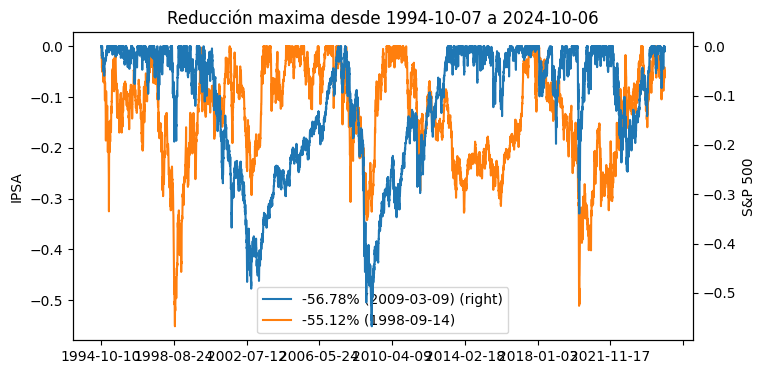

In [ ]:
ax = rm_syp500["Drawdown"].plot(secondary_y=True, figsize=(8,4), legend=True, label="-56.78% (2009-03-09)")
rm_ipsa["Drawdown"].plot(legend=True, label="-55.12% (1998-09-14)", ax=ax)
plt.title("Reducción maxima desde 1994-10-07 a 2024-10-06")
ax.set_ylabel("S&P 500")  # Eje Y derecho para S&P 500
ax.left_ax.set_ylabel("IPSA")  # Eje Y izquierdo para IPSA
plt.show()

Análisis: El análisis de la reducción máxima refleja la naturaleza cíclica y los períodos de crisis que han afectado ambos índices. Para el S&P 500, la mayor reducción se produjo el 9 de marzo de 2009, con una caída del -56,78%, como resultado de la crisis financiera global que impactó significativamente los mercados en todo el mundo. La economía estadounidense, en particular, sufrió grandes pérdidas debido a la burbuja inmobiliaria y la posterior crisis de crédito.
El IPSA, por su parte, experimentó su mayor caída el 14 de septiembre de 1998, con una reducción del -55,12%, influenciada por la crisis financiera asiática de 1997 y la crisis en Rusia, que afectaron severamente a los mercados emergentes como Chile. La economía chilena, al ser más dependiente de la exportación de materias primas, es más vulnerable a estos choques externos, lo que explica una caída comparable en magnitud a la del S&P 500.

###Análisis de la distribución y el riesgo

In [ ]:
def skewness(r):
    """Alternativa a scipy.stats.skew()
       Calcula la asimetría de la Serie o DataFrame suministrado
       Devuelve un flotador o una Serie
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

def kurtosis(r):
    """Alternativa a scipy.stats.kurtosis()
       Calcula la curtosis de la Serie o DataFrame suministrado
       Devuelve un valor flotante o una Serie
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4

import scipy.stats
def is_normal(r, level=0.01):
    """Aplica el test de Jarque-Bera para determinar si una Serie es normal o no
       La prueba se aplica al nivel del 1% por defecto
       Devuelve Verdadero si se acepta la hipótesis de normalidad, Falso en caso contrario
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(is_normal)
    else:
        statistic, p_value = scipy.stats.jarque_bera(r)
        return p_value > level

from scipy.stats import norm
def var_gaussian(r, level=1, modified=False):
    """Devuelve el VaR Paramétrico Gauusiano de una Serie o DataFrame.
       Si «modified» es True, se devuelve el VaR modificado,
       utilizando la modificación de Cornish-Fisher
    """
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(level/100)
    if modified:
        # modify the Z score based on observed skewness and kurtosis
        s = skewness(r)
        k = kurtosis(r)
        z = (z +
                (z**2 - 1)*s/6 +
                (z**3 -3*z)*(k-3)/24 -
                (2*z**3 - 5*z)*(s**2)/36
            )
    return (r.mean() + z*r.std(ddof=0))

def cvar(r, level=1):
    """Calcula el VaR Condicional de Series o DataFrame
    """
    if isinstance(r, pd.Series):
        is_beyond = r <= var_gaussian(r, level=level, modified=True)
        return r[is_beyond].mean()
    elif isinstance(r, pd.DataFrame):
        return r.aggregate(cvar, level=level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")

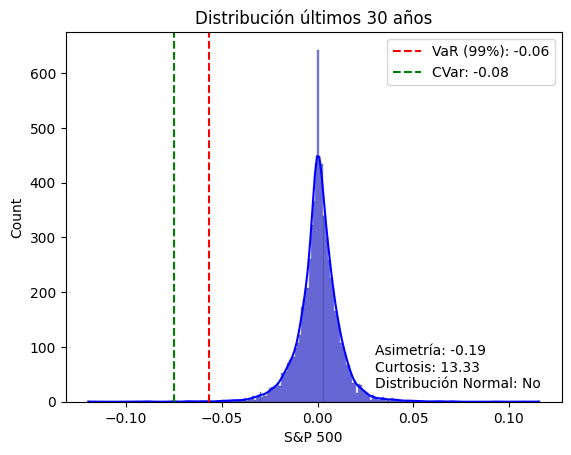

In [ ]:
# Cálculo de las métricas
s_sp_500 = skewness(retornos["S&P 500"])                       # Asimetría
c_sp_500 = kurtosis(retornos["S&P 500"])                       # Curtosis
isn_sp_500 = "Sí" if is_normal(retornos["S&P 500"]) else "No"  # Normalidad

# Var_gaussian y Cvar
var = var_gaussian(retornos["S&P 500"], level=1, modified=True)
cvar_gaussian = cvar(retornos["S&P 500"], level=1)

# Crear el histograma con Seaborn
sns.histplot(retornos["S&P 500"], color="blue", kde=True)

# Agregar el título
plt.title("Distribución últimos 30 años")

# Añadir etiquetas con los valores de las métricas dentro del gráfico
plt.text(0.03, 85, f"Asimetría: {s_sp_500:.2f}", fontsize=10, color="black")
plt.text(0.03, 55, f"Curtosis: {c_sp_500:.2f}", fontsize=10, color="black")
plt.text(0.03, 25, f"Distribución Normal: {isn_sp_500}", fontsize=10, color="black")


# Añadir líneas verticales para VaR y CVaR
plt.axvline(x=var, color='red', linestyle='--', label=f'VaR (99%): {var:.2f}')
plt.axvline(x=cvar_gaussian, color='green', linestyle='--', label=f'CVar: {cvar_gaussian:.2f}')

# Añadir leyenda para las líneas
plt.legend()

# Mostrar el gráfico
plt.show()

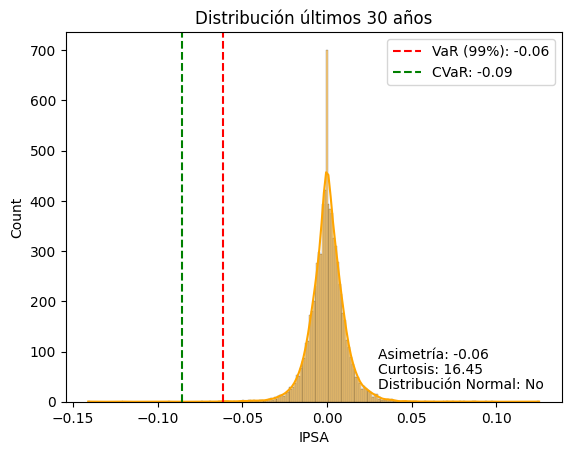

In [ ]:
# Cálculo de las métricas
s_ipsa = skewness(retornos["IPSA"])                       # Asimetría
c_ipsa = kurtosis(retornos["IPSA"])                       # Curtosis
isn_ipsa = "Sí" if is_normal(retornos["IPSA"]) else "No"  # Normalidad

# Var_gaussian y Cvar
var = var_gaussian(retornos["IPSA"], level=1, modified=True)
cvar_gaussian = cvar(retornos["IPSA"], level=1)

# Crear el histograma con Seaborn
sns.histplot(retornos["IPSA"], color="orange", kde=True)

# Agregar el título
plt.title("Distribución últimos 30 años")

# Añadir etiquetas con los valores de las métricas dentro del gráfico
plt.text(0.03, 85, f"Asimetría: {s_ipsa:.2f}", fontsize=10, color="black")
plt.text(0.03, 55, f"Curtosis: {c_ipsa:.2f}", fontsize=10, color="black")
plt.text(0.03, 25, f"Distribución Normal: {isn_ipsa}", fontsize=10, color="black")


# Añadir líneas verticales para VaR y CVaR
plt.axvline(x=var, color='red', linestyle='--', label=f'VaR (99%): {var:.2f}')
plt.axvline(x=cvar_gaussian, color='green', linestyle='--', label=f'CVaR: {cvar_gaussian:.2f}')

# Añadir leyenda para las líneas
plt.legend()

# Mostrar el gráfico
plt.show()

Análisis: Tanto el S&P 500 como el IPSA presentan distribuciones no normales, como lo confirman los resultados del test de Jarque-Bera. La asimetría negativa en ambos índices (-0,19 para el S&P 500 y -0,06 para el IPSA) indica que las caídas son más frecuentes que las subidas extremas, un comportamiento típico en los mercados bursátiles. La curtosis elevada (13,33 para el S&P 500 y 16,45 para el IPSA) señala la presencia de eventos extremos o "colas gruesas", lo que sugiere que ambos índices han experimentado movimientos abruptos, probablemente debido a crisis globales o eventos inesperados.
En cuanto al valor en riesgo (VaR) semiparamétrico de Cornish-Fisher en valores nominales diarios, los resultados de -0,06 para ambos índices al 99% indican que ambos mercados tienen una probabilidad similar de experimentar pérdidas significativas diarias bajo condiciones normales de mercado. Sin embargo, el valor en riesgo condicional (CVaR) es ligeramente mayor para el IPSA (-0,09) comparado con el S&P 500 (-0,08), lo que sugiere que, en condiciones de estrés financiero, las pérdidas diarias esperadas son mayores para el índice chileno, reflejando su mayor vulnerabilidad a crisis severas.

###Comparación por décadas

In [ ]:
#1994-2004
indices_90 = indices["1994-10-07":"2004-10-06"]

# Calcular los retornos porcentuales
retornos = indices_90.pct_change().dropna()

# Calcular el retorno compuesto y convertir a porcentaje con dos decimales
r_compuesto = ((retornos + 1).prod() - 1) * 100
r_compuesto = r_compuesto.round(2)

# Número de periodos
n_periodos = indices.shape[0]

# Cálculo del retorno anualizado, convertido a porcentaje y redondeado
r_anual = (((r_compuesto / 100 + 1) ** (252 / n_periodos) - 1) * 100).round(2)

# Cálculo de la volatilidad anualizada, convertida a porcentaje y redondeada
v_anual = (retornos.std() * np.sqrt(252) * 100).round(2)

# Coeficiente de variación (CoV)
cov = (r_anual / v_anual).round(2)

# Ratio de Sharpe, con una tasa libre de riesgo del 3% (0.03)
r_sharpe = ((r_anual - 3) / v_anual).round(2)

# Crear el DataFrame para almacenar los resultados
indicadores = pd.DataFrame({
    'S&P 500': [r_compuesto["S&P 500"], r_anual["S&P 500"], v_anual["S&P 500"], cov["S&P 500"], r_sharpe["S&P 500"]],
    'IPSA': [r_compuesto["IPSA"], r_anual["IPSA"], v_anual["IPSA"], cov["IPSA"], r_sharpe["IPSA"]]
}, index=['Retorno Compuesto', 'Retorno Anualizado', 'Volatilidad Anualizada', 'CoV', 'Ratio Sharpe'])

# Formatear las columnas con porcentaje para incluir el símbolo %
indicadores_pct = indicadores.map(lambda x: f"{x:.2f}%" if x > 1  else x)

# Mostrar el DataFrame
print(indicadores_pct)

                        S&P 500    IPSA
Retorno Compuesto       150.94%  67.67%
Retorno Anualizado        3.04%   1.70%
Volatilidad Anualizada   17.99%  18.60%
CoV                        0.17    0.09
Ratio Sharpe                0.0   -0.07


In [ ]:
rm_syp500 = drawdown(retornos["S&P 500"])
rm_ipsa = drawdown(retornos["IPSA"])

# Obtener los valores mínimos y sus índices para cada serie
min_syp500 = rm_syp500["Drawdown"].min()*100       # Valor mínimo de S&P 500
idx_min_syp500 = rm_syp500["Drawdown"].idxmin()   # Índice en el que ocurre el valor mínimo de S&P 500

min_ipsa = rm_ipsa["Drawdown"].min()*100           # Valor mínimo de IPSA
idx_min_ipsa = rm_ipsa["Drawdown"].idxmin()       # Índice en el que ocurre el valor mínimo de IPSA

# Crear un DataFrame para almacenar los resultados, aplicando la función round() a los valores numéricos
r_maxima = pd.DataFrame({
    'Valor mínimo': [round(min_syp500, 2), round(min_ipsa, 2)],  # Usar round() para redondear valores flotantes
    'Fecha mínima': [idx_min_syp500, idx_min_ipsa]               # Fechas no necesitan redondeo
}, index=['S&P 500', 'IPSA'])

# Formatear las columnas con porcentaje para incluir el símbolo %
ind_rmaxima = r_maxima.apply(lambda x: x.map(lambda x: f"{x:.2f}%" if isinstance(x, (int, float)) else x))

# Mostrar el DataFrame con los resultados
print(ind_rmaxima)

        Valor mínimo Fecha mínima
S&P 500      -49.15%   2002-10-09
IPSA         -55.12%   1998-09-14


In [ ]:
# Var_gaussian y Cvar
var_syp_500 = var_gaussian(retornos["S&P 500"], level=1, modified=True)
cvar_gaussian_syp_500 = cvar(retornos["S&P 500"], level=1)
var_ipsa = var_gaussian(retornos["IPSA"], level=1, modified=True)
cvar_gaussian_ipsa = cvar(retornos["IPSA"], level=1)

# Crear el DataFrame para almacenar los resultados
indicadores = pd.DataFrame({
    'S&P 500': [var_syp_500, cvar_gaussian_syp_500],
    'IPSA': [var_ipsa, cvar_gaussian_ipsa]
}, index=["Var Cornish-Fisher", "Var Condicional"])

# Formatear las columnas con porcentaje para incluir el símbolo %
indicadores_pct = indicadores.map(lambda x: f"{x:.2f}" if x < 1  else x)

# Mostrar el DataFrame
print(indicadores_pct)

                   S&P 500   IPSA
Var Cornish-Fisher   -0.03  -0.04
Var Condicional      -0.05  -0.05


Análisis: Durante la primera década, ambos índices presentaron un desempeño moderado, con retornos compuestos del 150,94% para el S&P 500 y del 67,67% para el IPSA. Sin embargo, los efectos de la burbuja de las puntocom a finales de los 90 y la crisis de los mercados emergentes impactaron ambos mercados.
El IPSA mostró una mayor volatilidad (18,60% frente al 17,99% del S&P 500), reflejando el riesgo inherente en economías más pequeñas y menos diversificadas. El ratio Sharpe negativo del IPSA (-0,07) sugiere que no hubo compensación suficiente por el riesgo en este período, mientras que el S&P 500, aunque bajo, mantuvo una relación más equilibrada. Los valores condicionales presentan valores idénticos de los cuales, podemos estimar que ambos índices perderán como máximo el 5% de su valor diario en confianza del 0.99.

In [ ]:
#2004-2014
indices_00 = indices["2004-10-07":"2014-10-06"]

# Calcular los retornos porcentuales
retornos = indices_00.pct_change().dropna()

# Calcular el retorno compuesto y convertir a porcentaje con dos decimales
r_compuesto = ((retornos + 1).prod() - 1) * 100
r_compuesto = r_compuesto.round(2)

# Número de periodos
n_periodos = indices.shape[0]

# Cálculo del retorno anualizado, convertido a porcentaje y redondeado
r_anual = (((r_compuesto / 100 + 1) ** (252 / n_periodos) - 1) * 100).round(2)

# Cálculo de la volatilidad anualizada, convertida a porcentaje y redondeada
v_anual = (retornos.std() * np.sqrt(252) * 100).round(2)

# Coeficiente de variación (CoV)
cov = (r_anual / v_anual).round(2)

# Ratio de Sharpe, con una tasa libre de riesgo del 3% (0.03)
r_sharpe = ((r_anual - 3) / v_anual).round(2)

# Crear el DataFrame para almacenar los resultados
indicadores = pd.DataFrame({
    'S&P 500': [r_compuesto["S&P 500"], r_anual["S&P 500"], v_anual["S&P 500"], cov["S&P 500"], r_sharpe["S&P 500"]],
    'IPSA': [r_compuesto["IPSA"], r_anual["IPSA"], v_anual["IPSA"], cov["IPSA"], r_sharpe["IPSA"]]
}, index=['Retorno Compuesto', 'Retorno Anualizado', 'Volatilidad Anualizada', 'CoV', 'Ratio Sharpe'])

# Formatear las columnas con porcentaje para incluir el símbolo %
indicadores_pct = indicadores.map(lambda x: f"{x:.2f}%" if x > 1  else x)

# Mostrar el DataFrame
print(indicadores_pct)

                       S&P 500     IPSA
Retorno Compuesto       73.78%  130.01%
Retorno Anualizado       1.81%    2.75%
Volatilidad Anualizada  20.10%   16.60%
CoV                       0.09     0.17
Ratio Sharpe             -0.06    -0.02


In [ ]:
rm_syp500 = drawdown(retornos["S&P 500"])
rm_ipsa = drawdown(retornos["IPSA"])

# Obtener los valores mínimos y sus índices para cada serie
min_syp500 = rm_syp500["Drawdown"].min()*100       # Valor mínimo de S&P 500
idx_min_syp500 = rm_syp500["Drawdown"].idxmin()   # Índice en el que ocurre el valor mínimo de S&P 500

min_ipsa = rm_ipsa["Drawdown"].min()*100           # Valor mínimo de IPSA
idx_min_ipsa = rm_ipsa["Drawdown"].idxmin()       # Índice en el que ocurre el valor mínimo de IPSA

# Crear un DataFrame para almacenar los resultados, aplicando la función round() a los valores numéricos
r_maxima = pd.DataFrame({
    'Valor mínimo': [round(min_syp500, 2), round(min_ipsa, 2)],  # Usar round() para redondear valores flotantes
    'Fecha mínima': [idx_min_syp500, idx_min_ipsa]               # Fechas no necesitan redondeo
}, index=['S&P 500', 'IPSA'])

# Formatear las columnas con porcentaje para incluir el símbolo %
ind_rmaxima = r_maxima.apply(lambda x: x.map(lambda x: f"{x:.2f}%" if isinstance(x, (int, float)) else x))

# Mostrar el DataFrame con los resultados
print(ind_rmaxima)

        Valor mínimo Fecha mínima
S&P 500      -56.78%   2009-03-09
IPSA         -39.96%   2008-10-10


In [ ]:
# Var_gaussian y Cvar
var_syp_500 = var_gaussian(retornos["S&P 500"], level=1, modified=True)
cvar_gaussian_syp_500 = cvar(retornos["S&P 500"], level=1)
var_ipsa = var_gaussian(retornos["IPSA"], level=1, modified=True)
cvar_gaussian_ipsa = cvar(retornos["IPSA"], level=1)

# Crear el DataFrame para almacenar los resultados
indicadores = pd.DataFrame({
    'S&P 500': [var_syp_500, cvar_gaussian_syp_500],
    'IPSA': [var_ipsa, cvar_gaussian_ipsa]
}, index=["Var Cornish-Fisher", "Var Condicional"])

# Formatear las columnas con porcentaje para incluir el símbolo %
indicadores_pct = indicadores.map(lambda x: f"{x:.2f}" if x < 1  else x)

# Mostrar el DataFrame
print(indicadores_pct)

                   S&P 500   IPSA
Var Cornish-Fisher   -0.06  -0.05
Var Condicional      -0.08  -0.06


Análisis: Esta década estuvo marcada por la crisis financiera global de 2008-2009. El S&P 500 experimentó su mayor reducción (-56,78%) en 2009, mientras que el IPSA alcanzó una caída significativa del -39,96% en 2008. En términos de rendimiento, el IPSA superó al S&P 500 con un retorno compuesto del 130,01% frente al 73,78%, impulsado por el auge de las materias primas que benefició a Chile. No obstante, la volatilidad del S&P 500 fue mayor (20,10%), reflejando las fuertes oscilaciones del mercado estadounidense en comparación con el IPSA (16,60%). El ratio Sharpe fue negativo para ambos índices, lo que indica que el retorno ajustado al riesgo fue pobre en ambos casos. El fenómeno de la crisis se puede profundizar al observar que el valor en riesgo condicional fue de un 8% para el S&P 500, un 2% más alto que el IPSA, de lo cual se puede concluir que las pérdidas diarias en el periodo fueron mucho más profundas en Estados Unidos que en Chile.

In [ ]:
#2014-2024
indices_20 = indices["2014-10-07":"2024-10-06"]

# Calcular los retornos porcentuales
retornos = indices_20.pct_change().dropna()

# Calcular el retorno compuesto y convertir a porcentaje con dos decimales
r_compuesto = ((retornos + 1).prod() - 1) * 100
r_compuesto = r_compuesto.round(2)

# Número de periodos
n_periodos = indices.shape[0]

# Cálculo del retorno anualizado, convertido a porcentaje y redondeado
r_anual = (((r_compuesto / 100 + 1) ** (252 / n_periodos) - 1) * 100).round(2)

# Cálculo de la volatilidad anualizada, convertida a porcentaje y redondeada
v_anual = (retornos.std() * np.sqrt(252) * 100).round(2)

# Coeficiente de variación (CoV)
cov = (r_anual / v_anual).round(2)

# Ratio de Sharpe, con una tasa libre de riesgo del 3% (0.03)
r_sharpe = ((r_anual - 3) / v_anual).round(2)

# Crear el DataFrame para almacenar los resultados
indicadores = pd.DataFrame({
    'S&P 500': [r_compuesto["S&P 500"], r_anual["S&P 500"], v_anual["S&P 500"], cov["S&P 500"], r_sharpe["S&P 500"]],
    'IPSA': [r_compuesto["IPSA"], r_anual["IPSA"], v_anual["IPSA"], cov["IPSA"], r_sharpe["IPSA"]]
}, index=['Retorno Compuesto', 'Retorno Anualizado', 'Volatilidad Anualizada', 'CoV', 'Ratio Sharpe'])

# Formatear las columnas con porcentaje para incluir el símbolo %
indicadores_pct = indicadores.map(lambda x: f"{x:.2f}%" if x > 1  else x)

# Mostrar el DataFrame
print(indicadores_pct)

                        S&P 500    IPSA
Retorno Compuesto       197.20%  64.77%
Retorno Anualizado        3.61%   1.64%
Volatilidad Anualizada   17.62%  18.36%
CoV                         0.2    0.09
Ratio Sharpe               0.03   -0.07


In [ ]:
rm_syp500 = drawdown(retornos["S&P 500"])
rm_ipsa = drawdown(retornos["IPSA"])

# Obtener los valores mínimos y sus índices para cada serie
min_syp500 = rm_syp500["Drawdown"].min()*100       # Valor mínimo de S&P 500
idx_min_syp500 = rm_syp500["Drawdown"].idxmin()   # Índice en el que ocurre el valor mínimo de S&P 500

min_ipsa = rm_ipsa["Drawdown"].min()*100           # Valor mínimo de IPSA
idx_min_ipsa = rm_ipsa["Drawdown"].idxmin()       # Índice en el que ocurre el valor mínimo de IPSA

# Crear un DataFrame para almacenar los resultados, aplicando la función round() a los valores numéricos
r_maxima = pd.DataFrame({
    'Valor mínimo': [round(min_syp500, 2), round(min_ipsa, 2)],  # Usar round() para redondear valores flotantes
    'Fecha mínima': [idx_min_syp500, idx_min_ipsa]               # Fechas no necesitan redondeo
}, index=['S&P 500', 'IPSA'])

# Formatear las columnas con porcentaje para incluir el símbolo %
ind_rmaxima = r_maxima.apply(lambda x: x.map(lambda x: f"{x:.2f}%" if isinstance(x, (int, float)) else x))

# Mostrar el DataFrame con los resultados
print(ind_rmaxima)

        Valor mínimo Fecha mínima
S&P 500      -33.92%   2020-03-23
IPSA         -51.09%   2020-03-18


In [ ]:
# Var_gaussian y Cvar
var_syp_500 = var_gaussian(retornos["S&P 500"], level=1, modified=True)
cvar_gaussian_syp_500 = cvar(retornos["S&P 500"], level=1)
var_ipsa = var_gaussian(retornos["IPSA"], level=1, modified=True)
cvar_gaussian_ipsa = cvar(retornos["IPSA"], level=1)

# Crear el DataFrame para almacenar los resultados
indicadores = pd.DataFrame({
    'S&P 500': [var_syp_500, cvar_gaussian_syp_500],
    'IPSA': [var_ipsa, cvar_gaussian_ipsa]
}, index=["Var Cornish-Fisher", "Var Condicional"])

# Formatear las columnas con porcentaje para incluir el símbolo %
indicadores_pct = indicadores.map(lambda x: f"{x:.2f}" if x < 1  else x)

# Mostrar el DataFrame
print(indicadores_pct)

                   S&P 500   IPSA
Var Cornish-Fisher   -0.07  -0.09
Var Condicional      -0.10  -0.12


Análisis: La última década estuvo marcada por la recuperación posterior a la crisis financiera y la pandemia del COVID-19. El S&P 500 mostró un retorno compuesto del 197,20%, impulsado por la expansión tecnológica y los estímulos fiscales en EE.UU. El IPSA, sin embargo, tuvo un crecimiento más modesto del 64,77%, afectado por la inestabilidad política en Chile y la caída de los precios de las materias primas. La volatilidad se mantuvo alta en ambos índices, pero con una mejor relación entre riesgo y retorno para el S&P 500 (Sharpe de 0,03), mientras que el IPSA continuó mostrando un rendimiento ajustado al riesgo negativo (-0,07). El valor en riesgo condicional en esta década fue mayor para el IPSA con una pérdida máxima diaria del 12%, un 2% más alta que el S&P 500 con una confianza del 99%.